### `Project - MovieLens Data Analysis`

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

### `Objective:`
- To implement the techniques learnt as a part of the course.

### `Datasets Information:`

*rating.csv:* It contains information on ratings given by the users to a particular movie.
- user id: id assigned to every user
- movie id: id assigned to every movie
- rating: rating given by the user
- timestamp: Time recorded when the user gave a rating

*movie.csv:* File contains information related to the movies and their genre.
- movie id: id assigned to every movie
- movie title: Title of the movie
- release date: Date of release of the movie
- Action: Genre containing binary values (1 - for action 0 - not action)
- Adventure: Genre containing binary values (1 - for adventure 0 - not adventure)
- Animation: Genre containing binary values (1 - for animation 0 - not animation)
- Children’s: Genre containing binary values (1 - for children's 0 - not children's)
- Comedy: Genre containing binary values (1 - for comedy 0 - not comedy)
- Crime: Genre containing binary values (1 - for crime 0 - not crime)
- Documentary: Genre containing binary values (1 - for documentary 0 - not documentary)
- Drama: Genre containing binary values (1 - for drama 0 - not drama)
- Fantasy: Genre containing binary values (1 - for fantasy 0 - not fantasy)
- Film-Noir: Genre containing binary values (1 - for film-noir 0 - not film-noir)
- Horror: Genre containing binary values (1 - for horror 0 - not horror)
- Musical: Genre containing binary values (1 - for musical 0 - not musical)
- Mystery: Genre containing binary values (1 - for mystery 0 - not mystery)
- Romance: Genre containing binary values (1 - for romance 0 - not romance)
- Sci-Fi: Genre containing binary values (1 - for sci-fi 0 - not sci-fi)
- Thriller: Genre containing binary values (1 - for thriller 0 - not thriller)
- War: Genre containing binary values (1 - for war 0 - not war)
- Western: Genre containing binary values (1 - for western - not western)


*user.csv:* It contains information of the users who have rated the movies.
- user id: id assigned to every user
- age: Age of the user
- gender: Gender of the user
- occupation: Occupation of the user
- zip code: Zip code of the use

**`Please provide your insights wherever necessary.`**

### `Learning Outcomes:`
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


### `Domain` 
- Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

### 1. Import the necessary packages - 2.5 marks

In [1]:
#your code here
# import the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Read the 3 datasets into dataframes - 2.5 marks

In [2]:
#your code here
# read file that contains information on ratings given by the users to a particular movie
data1 = pd.read_csv('C:/Users/Aylan/Documents/IT/AIML/Fundamentals of AIML/Project 1 - Foundation of AIML/Data.csv')
# read file that contains information related to the movies and their genre
data2 = pd.read_csv('C:/Users/Aylan/Documents/IT/AIML/Fundamentals of AIML/Project 1 - Foundation of AIML/item.csv')
# read file that contains information of the users who have rated the movies
data3 = pd.read_csv('C:/Users/Aylan/Documents/IT/AIML/Fundamentals of AIML/Project 1 - Foundation of AIML/user.csv')

### 3. Apply info, shape, describe, and find the number of missing values in the data. Present at least 3 observations from these operations - 2.5 marks
 - Note that you will need to do it for all the three datasets seperately

In [3]:
# display first five rows of the Data.csv data set
data1.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
# display information about the Data.csv data set
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [5]:
# display shape of Data.csv data set
data1.shape

(100000, 4)

In [6]:
# descriptive statistics of the Data.csv data set
data1.describe().round()

,user id,movie id,rating,timestamp
count,100000.0,100000.0,100000.0,100000.0
mean,462.0,426.0,4.0,883528851.0
std,267.0,331.0,1.0,5343856.0
min,1.0,1.0,1.0,874724710.0
25%,254.0,175.0,3.0,879448710.0
50%,447.0,322.0,4.0,882826944.0
75%,682.0,631.0,4.0,888259984.0
max,943.0,1682.0,5.0,893286638.0


In [7]:
# write missing values function
def missing_val_func(df):
    
    missing_values = df.isnull().sum()
    missing_val_percent = (missing_values / len(df)) * 100
    comb = pd.concat([missing_values, missing_val_percent], axis = 1)
    comb_ren = comb.rename(columns={0:'missing_values', 1:'%missing_values'})
    comb_ren_final = comb_ren[comb_ren.iloc[:,1] != 0].sort_values('%missing_values', ascending=False)
    print("\n","The data set has " + str(df.shape[1]) + " columns.\n "
         "The number of columns with missing values is " + str(comb_ren_final.shape[0]))
    return comb_ren_final

In [8]:
# apply the function on the Data.csv data set
missing_val_func(data1)


 The data set has 4 columns.
 The number of columns with missing values is 0


,missing_values,%missing_values


In [9]:
# find the number of missing values in the Data.csv data set
data1.isnull().sum().sum()

0

**Observations:**
- The data set has 100000 rows and 4 columns.
- All four columns contain data of integer type (int64).
- The data set has no missing values.
- We can also notice, from the describe function, that movies are rated from 1.0 to 5.0. Probably number of stars.

In [10]:
# display first five rows of the item.csv data set
data2.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [11]:
# display information about the item.csv data set
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

In [12]:
# display shape of item.csv data set
data2.shape

(1681, 22)

In [13]:
# descriptive statistics of the item.csv data set
data2.describe().round().T

,count,mean,std,min,25%,50%,75%,max
movie id,1681.0,842.0,486.0,1.0,422.0,842.0,1262.0,1682.0
unknown,1681.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Action,1681.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Adventure,1681.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Animation,1681.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Childrens,1681.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Comedy,1681.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
Crime,1681.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Documentary,1681.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Drama,1681.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [14]:
# apply the function on the item.csv data set
missing_val_func(data2)


 The data set has 22 columns.
 The number of columns with missing values is 0


,missing_values,%missing_values


In [15]:
# find the number of missing values in the item.csv data set
data2.isnull().sum().sum()

0

**Observations:**
- The data set has 1681 rows and 22 columns.
- All columns contain integer type data except for the "movie title" and "release date" columns which have obkect type data
- The data set has no missing values.

In [16]:
# display first five rows of the user.csv data set
data3.head()

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [17]:
# display information about the user.csv data set
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [18]:
# display shape of user.csv data set
data3.shape

(943, 5)

In [19]:
# descriptive statistics of the user.csv data set
data3.describe(include='all').round()

,user id,age,gender,occupation,zip code
count,943.0,943.0,943,943,943
unique,NaN,NaN,2,21,795
top,NaN,NaN,M,student,55414
freq,NaN,NaN,670,196,9
mean,472.0,34.0,NaN,NaN,NaN
std,272.0,12.0,NaN,NaN,NaN
min,1.0,7.0,NaN,NaN,NaN
25%,236.0,25.0,NaN,NaN,NaN
50%,472.0,31.0,NaN,NaN,NaN
75%,708.0,43.0,NaN,NaN,NaN


In [20]:
# apply the function on the user.csv data set
missing_val_func(data3)


 The data set has 5 columns.
 The number of columns with missing values is 0


,missing_values,%missing_values


In [21]:
# find the number of missing values in the user.csv data set
data3.isnull().sum().sum()

0

**Observations:**
- The data set has 943 columns and 5 rows.
- The "user id" and "age" columns are of integer type. "gender", "occupation" and "zip code" columns are object ype columns.
- The data set has no missing values.

### 4. Find the number of movies per genre using the item data - 2.5 marks

In [41]:
# find the number of movies per genre
data2[['unknown', 'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 
       'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']].sum(axis=0)

unknown          1
Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64

**Insights:**
- The Drama genre has the highest number of movies followed by the Comedy genre.
- The Fantasy genre has the lowest number of movies.
- There is only one movie of unknown genre in the unknown genre column.

### 5. Drop the movie where the genre is unknown - 2.5 marks

In [23]:
# drop the movie where the genre is unknown
# first we need to find the index where the genre is unknown
df1 = data2[data2['unknown'] == 1]
df1.index

Int64Index([1371], dtype='int64')

In [24]:
# drop row at index 1371
data2.drop(index=1371)

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1678,Mat' i syn,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1677,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1678,1680,Sliding Doors,01-Jan-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1679,1681,You So Crazy,01-Jan-1994,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


**Insights:**
- There is only one movie of unknown genre at index 1371.

### 6. Find the movies that have more than one genre - 5 marks

hint: use sum on the axis = 1

Display movie name, number of genres for the movie in dataframe

and also print(total number of movies which have more than one genres)

In [44]:
# find the movies that have more than one genre
df2 = data2[data2[['unknown', 'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 
       'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']].sum(axis=1) > 1]
df2

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
6,7,Twelve Monkeys,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667,1669,MURDER and murder,20-Jun-1997,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1668,1670,Tainted,01-Feb-1998,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1671,1673,Mirage,01-Jan-1995,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1677,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [51]:
# display movie name and number of genres for the movie in dataframe
df3 = pd.DataFrame({'Movie Name': df2['movie title'], 
                    'Number of Genres': df2[['unknown', 'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 
                                             'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 
                                             'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']].sum(axis=1)})
df3

,Movie Name,Number of Genres
0,Toy Story,3
1,GoldenEye,3
3,Get Shorty,3
4,Copycat,3
6,Twelve Monkeys,2
...,...,...
1667,MURDER and murder,3
1668,Tainted,2
1671,Mirage,2
1677,B. Monkey,2


In [55]:
# total number of movies with more than one genre
df3['Movie Name'].nunique()

838

**Insights:**
- There are 838 movies with more than one genre.


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

*HINT: Use distplot for age and countplot for release year, ratings, *

*HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split() as depicted below or you could convert it to pandas datetime format and extract year (.dt.year)*

In [27]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


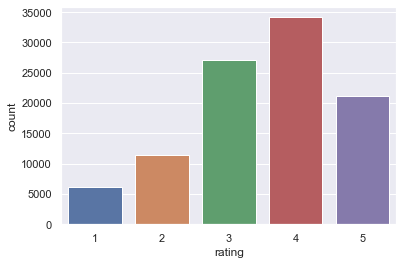

In [58]:
# univariate plot of column rating
sns.countplot(data1['rating'])

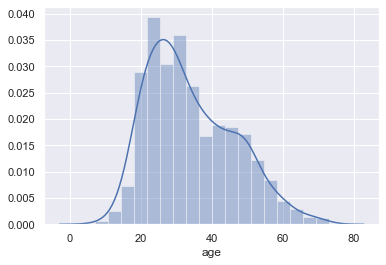

In [59]:
# univariate plot of column age
sns.distplot(data3['age'])

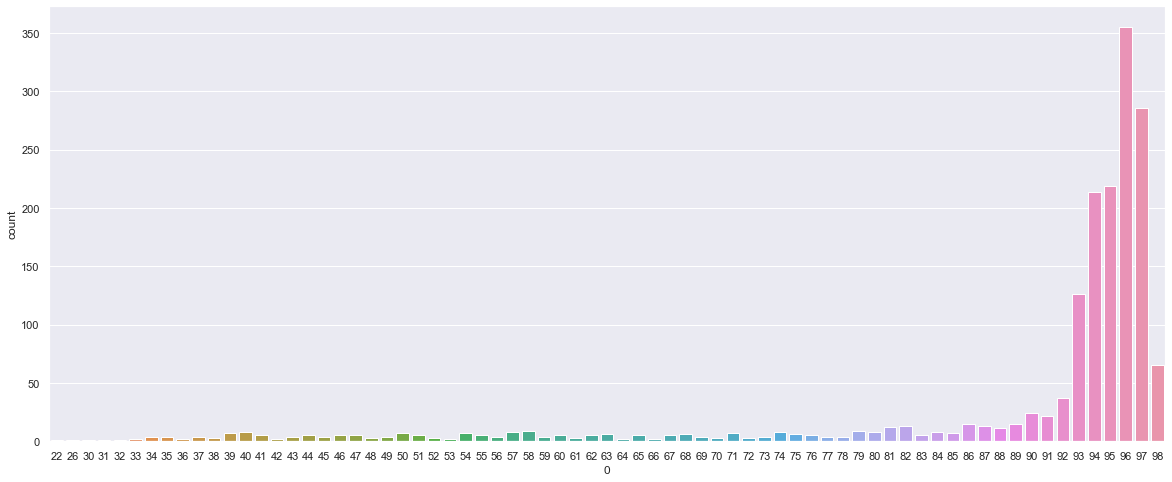

In [77]:
# extract year from release date column
a_list = []
for s in data2['release date']:
    x = s[-2:]
    a_list.append(x)

df4 = pd.DataFrame(a_list)

# univariate plot of release year
plt.figure(figsize=(20, 8))
sns.countplot(df4[0])

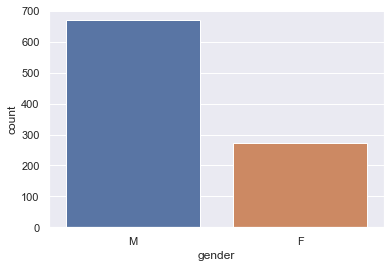

In [78]:
# univariate plot of gender column
sns.countplot(data3['gender'])

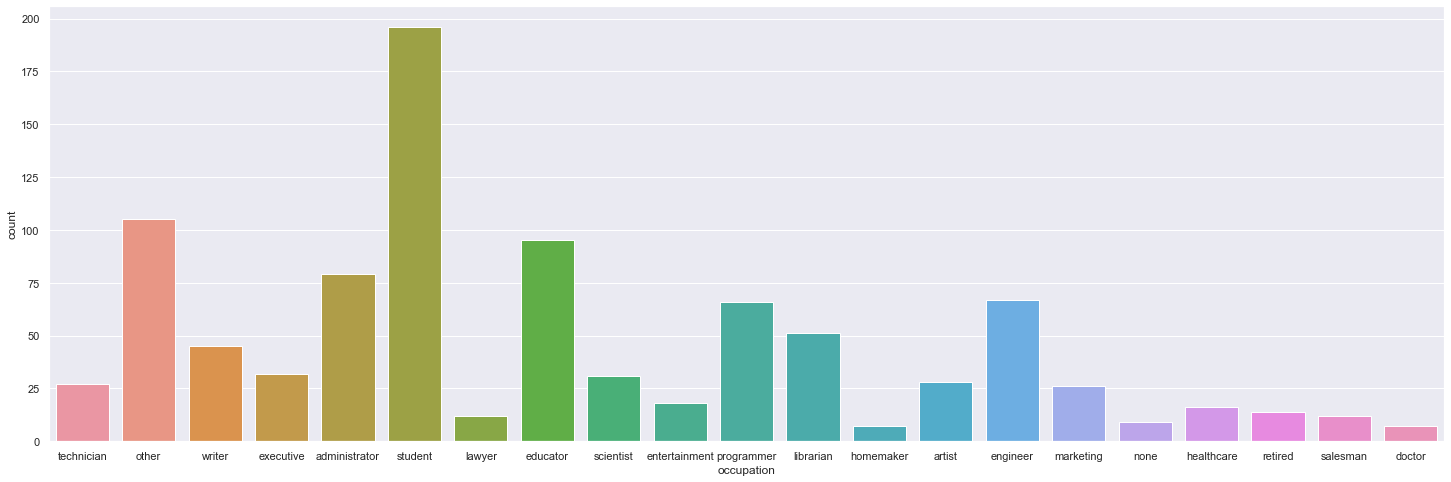

In [82]:
# univariate plot of occupation column
plt.figure(figsize=(25, 8))
sns.countplot(data3['occupation'])

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the **percent of number of releases in a year** as a parameter of popularity of a genre

Hint 1: You need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa. (Drop unnecessary column if there are any)

Hint 2: Find the total number of movies release in a year(use `sum(axis=1)` store that value in a new column as 'total'). Now divide the value of each genre in that year by total to get percentage number of release in a particular year.
`(df.div(df['total'], axis= 0) * 100)`

Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 3: Use groupby on the relevant column and use sum() on the same to find out the number of releases in a year/genre.  

In [87]:
# Visualize how popularity of genres has changed over the years
df5 = df4[0].unique()
df5

array(['95', '96', '94', '67', '77', '93', '65', '82', '90', '92', '91',
       '37', '97', '81', '70', '72', '61', '39', '41', '68', '69', '54',
       '71', '88', '73', '79', '87', '86', '89', '74', '80', '85', '66',
       '57', '60', '84', '83', '75', '98', '40', '50', '64', '51', '62',
       '33', '56', '63', '58', '45', '76', '78', '59', '42', '53', '46',
       '55', '38', '34', '49', '48', '43', '44', '36', '35', '30', '52',
       '31', '22', '47', '32', '26'], dtype=object)

In [88]:
data2['year'] = df4
data2.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,95
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,95
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,95
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,95
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,95


In [90]:
# the number of release in a year in one genre
df6 = data2.groupby('year')['unknown', 'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 
       'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'].sum()
df6

<ipython-input-90-435e9706c2f0>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df6 = data2.groupby('year')['unknown', 'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',


,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
year,,,,,,,,,,,,,,,,,,,
22,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
26,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
30,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
31,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0,30,13,4,15,82,8,9,97,3,0,8,2,2,35,7,25,7,6
95,0,40,22,6,21,63,11,5,89,3,1,14,3,5,37,15,39,5,2
96,0,44,24,9,21,108,21,18,170,6,1,11,9,6,38,15,47,9,2


In [92]:
# find the total number of movies release in a year
total = df6[['unknown', 'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 
       'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']].sum(axis=1)
total

year
22      1
26      1
30      1
31      3
32      2
     ... 
94    353
95    381
96    559
97    496
98    117
Length: 71, dtype: int64

In [101]:
# get percentage number of release in a particular year
df6['total'] = total
df7 = (df6.div(df6['total'], axis= 0) * 100).round(2)
df7

,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,total
year,,,,,,,,,,,,,,,,,,,,
22,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,100.0
26,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,100.0
30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,100.0
31,0.0,0.00,0.00,0.00,0.00,0.00,33.33,0.00,0.00,0.00,33.33,0.00,0.00,0.00,0.00,0.00,33.33,0.00,0.00,100.0
32,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,50.00,0.00,0.00,50.00,0.00,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0.0,8.50,3.68,1.13,4.25,23.23,2.27,2.55,27.48,0.85,0.00,2.27,0.57,0.57,9.92,1.98,7.08,1.98,1.70,100.0
95,0.0,10.50,5.77,1.57,5.51,16.54,2.89,1.31,23.36,0.79,0.26,3.67,0.79,1.31,9.71,3.94,10.24,1.31,0.52,100.0
96,0.0,7.87,4.29,1.61,3.76,19.32,3.76,3.22,30.41,1.07,0.18,1.97,1.61,1.07,6.80,2.68,8.41,1.61,0.36,100.0


<ipython-input-115-fe8ad6340462>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df7.groupby(by=['year'])['unknown', 'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',


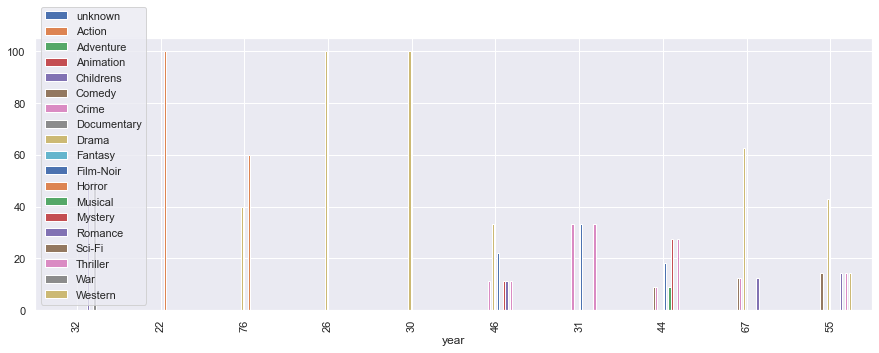

In [115]:
# head(10)
df7.groupby(by=['year'])['unknown', 'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 
       'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'].sum().reset_index().sort_values(['unknown', 'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 
       'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
                    ascending=True).head(10).plot(x='year',y=['unknown', 'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 
       'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],kind='bar', figsize=(15,5))

<ipython-input-114-bbd2584ad0fa>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df7.groupby(by=['year'])['unknown', 'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',


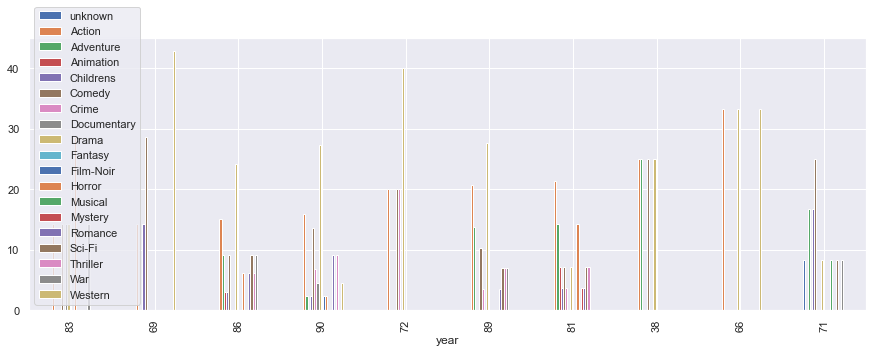

In [114]:
# tail(10)
df7.groupby(by=['year'])['unknown', 'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 
       'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'].sum().reset_index().sort_values(['unknown', 'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 
       'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
                    ascending=True).tail(10).plot(x='year',y=['unknown', 'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 
       'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],kind='bar', figsize=(15,5))

**Insights:**
- From the visulization above we can see that Crime genre were very popular in year 31 (purple bar). The popularity is average in the 90s


### 9. Find the top 25 movies in terms of average ratings for movies that have been rated more than 100 times - 10 marks

Hints : 

1. Find the count of ratings and average ratings for every movie.
2. Slice the movies which have ratings more than 100.
3. Sort values according to average rating such that movie which highest rating is on top.
4. Select top 25 movies.
5. You will have to use the .merge() function to get the movie titles.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [116]:
# Find the top 25 movies in terms of average ratings
# merge item.csv and Data.csv data sets
df8 = pd.merge(data1,data2,how='inner',on='movie id')
df8

,user id,movie id,rating,timestamp,movie title,release date,unknown,Action,Adventure,Animation,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
0,196,242,3,881250949,Kolya,24-Jan-1997,0,0,0,0,...,0,0,0,0,0,0,0,0,0,97
1,63,242,3,875747190,Kolya,24-Jan-1997,0,0,0,0,...,0,0,0,0,0,0,0,0,0,97
2,226,242,5,883888671,Kolya,24-Jan-1997,0,0,0,0,...,0,0,0,0,0,0,0,0,0,97
3,154,242,3,879138235,Kolya,24-Jan-1997,0,0,0,0,...,0,0,0,0,0,0,0,0,0,97
4,306,242,5,876503793,Kolya,24-Jan-1997,0,0,0,0,...,0,0,0,0,0,0,0,0,0,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99986,840,1674,4,891211682,Mamma Roma,01-Jan-1962,0,0,0,0,...,0,0,0,0,0,0,0,0,0,62
99987,655,1640,3,888474646,"Eighth Day, The",01-Nov-1996,0,0,0,0,...,0,0,0,0,0,0,0,0,0,96
99988,655,1637,3,888984255,Girls Town,23-Aug-1996,0,0,0,0,...,0,0,0,0,0,0,0,0,0,96
99989,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur)",02-Feb-1996,0,0,0,0,...,0,0,0,0,0,0,0,0,0,96


In [145]:
# find count of ratings
df9 = df8['movie title'].value_counts()
df9


Star Wars                   583
Contact                     509
Fargo                       508
Return of the Jedi          507
Liar Liar                   485
                           ... 
Homage                        1
Crude Oasis, The              1
T-Men                         1
Wend Kuuni (God's Gift)       1
New Age, The                  1
Name: movie title, Length: 1658, dtype: int64

In [140]:
# find average ratings
df10 = df8.groupby('movie title')['rating'].mean().sort_values(ascending=False)
df10
df10 = pd.DataFrame(df10)
df10

,rating
movie title,
Someone Else's America,5.0
Marlene Dietrich: Shadow and Light (,5.0
"Great Day in Harlem, A",5.0
Santa with Muscles,5.0
"Saint of Fort Washington, The",5.0
...,...
"Eye of Vichy, The (Oeil de Vichy, L')",1.0
Every Other Weekend,1.0
Mille bolle blu,1.0


In [143]:
df11 = pd.merge(df9,df10,how='outer',on='movie title')
df11

ValueError: You are trying to merge on int64 and object columns. If you wish to proceed you should use pd.concat

In [142]:
df11 = pd.concat([df9,df10],axis=1,sort=True)
df11

,movie title,rating
'Til There Was You,NaN,2.333333
1-900,NaN,2.600000
101 Dalmatians,NaN,2.908257
12 Angry Men,NaN,4.344000
187,NaN,3.024390
...,...,...
Young Guns,NaN,3.207921
Young Guns II,NaN,2.772727
"Young Poisoner's Handbook, The",NaN,3.341463
Zeus and Roxanne,NaN,2.166667


### 10. Check for the validity of the below statements with respect to the data provided - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women

**compare the percentages**

1. Merge all the datasets

2. There is no need to conduct statistical tests around this. Just **compare the percentages** and comment on the validity of the above statements.

3. you might want ot use the .sum(), .div() function here.

4. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

In [31]:
#your code here

**Conclusion:**
    
